## Importing necessary Libraries

In [7]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
fashion_mnist = tf.keras.datasets.fashion_mnist

## Train Neural Network on 60,000 Fashion-MNIST Images (data in NP array)

## Test Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

In [15]:
'''
class_labels:

0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot 

Classify the given input from above class using Neural Network

image shape 28 X 28 pixel ( Gray scale)

'''

'\nclass_labels:\n\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot \n\nClassify the given input from above class using Neural Network\n\nimage shape 28 X 28 pixel ( Gray scale)\n\n'

In [8]:
# Loading Data from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
# Let's understand the shape of the training data
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
# Let's understand the shape of the test data
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [12]:
# Lets check the first image in the for of a matrix
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
# Lets Check the label of the first image
y_train[0]

9

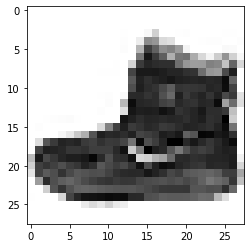

In [21]:
# Lets visualize the first image using matplotlib
plt.imshow(X_train[0], cmap = 'Greys')

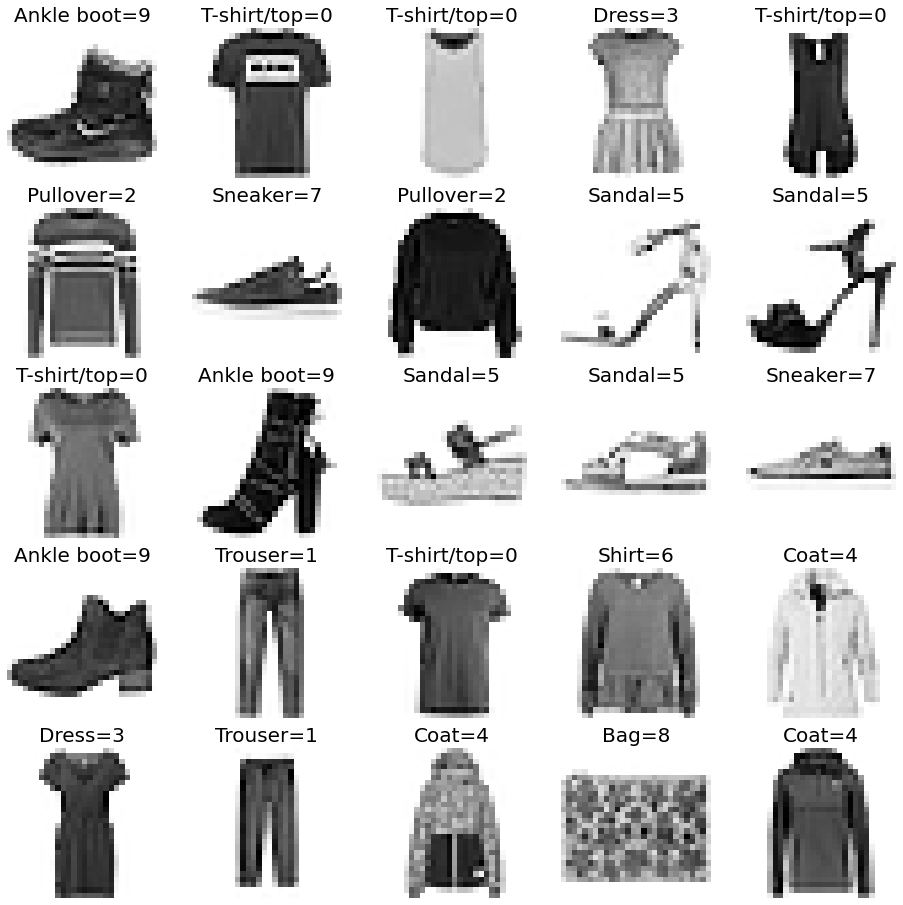

In [23]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

# Feature Scalling


In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Building our Neural Network

In [26]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compiling our Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4156 - accuracy: 0.8540


In [31]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3813 - accuracy: 0.8637
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3597 - accuracy: 0.8717
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8838
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3089 - accuracy: 0.8865
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3005 - accuracy: 0.8903
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8925
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2891 - accuracy: 0.8930
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.282

## Test and Evaluate Neural Network Model

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3805 - accuracy: 0.8624


[0.38054588437080383, 0.8623999953269958]

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
      dtype=float32)

In [35]:
np.argmax(y_pred[0].round(2))

9

In [36]:
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [37]:
y_test[0]

9

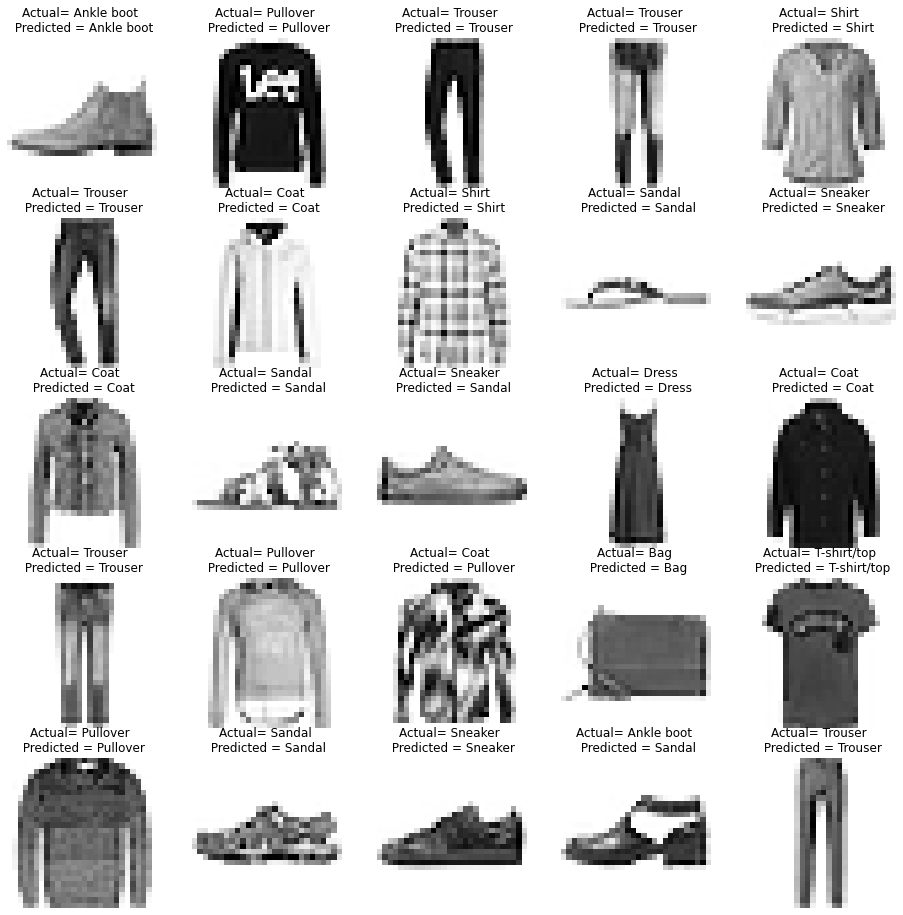

In [38]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

## Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<AxesSubplot:>

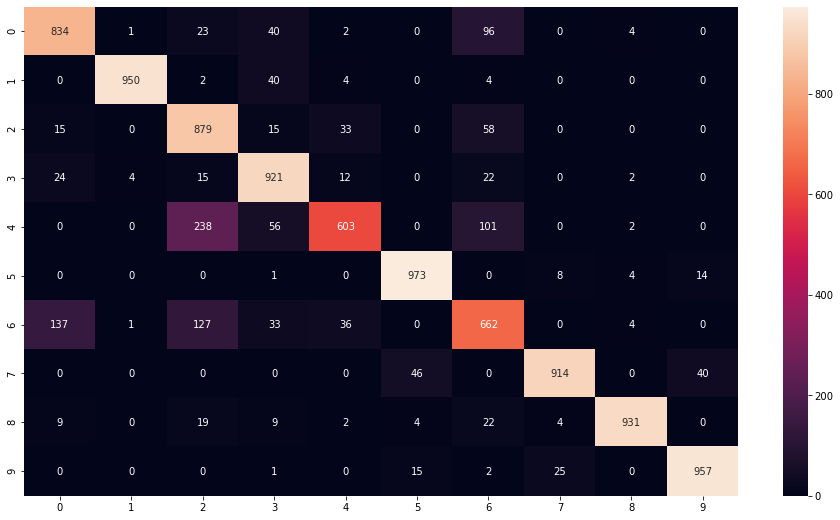

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

## Classification Report

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [42]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.83      0.83      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.67      0.88      0.76      1000
       Dress       0.83      0.92      0.87      1000
        Coat       0.87      0.60      0.71      1000
      Sandal       0.94      0.97      0.95      1000
       Shirt       0.68      0.66      0.67      1000
     Sneaker       0.96      0.91      0.94      1000
         Bag       0.98      0.93      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Save Model

In [43]:
model.save("MNIST_classifier_nn_model.h5")

In [44]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [45]:
model.predict(X_test)

array([[4.9723422e-08, 2.7317554e-10, 9.6395825e-09, ..., 9.8172668e-03,
        6.5636618e-06, 9.6658760e-01],
       [9.2639442e-05, 3.8129999e-11, 9.9853337e-01, ..., 6.4176447e-16,
        2.0402280e-07, 2.4970143e-18],
       [1.3957464e-05, 9.9998534e-01, 1.7813465e-09, ..., 3.0512258e-16,
        1.6337982e-09, 5.9556702e-16],
       ...,
       [6.6613285e-03, 4.5516244e-09, 8.4040992e-02, ..., 1.7418191e-07,
        9.0299326e-01, 1.5313170e-10],
       [2.4093886e-05, 9.9933654e-01, 6.9233333e-06, ..., 2.7413546e-10,
        6.9715907e-07, 3.4783983e-07],
       [1.1460552e-05, 1.5553525e-08, 1.5460499e-05, ..., 6.1490317e-03,
        1.6966998e-04, 1.1118440e-05]], dtype=float32)